In [1]:
%matplotlib inline
import os
import os.path as osp

from IPython.display import display, Image, Markdown
from ipywidgets import interact, interactive
import ipywidgets as widgets 
import matplotlib.pylab as plt
import numpy as np
import pickle

from attackgraph import settings

np.set_printoptions(precision=2)
RESULTS_DIR = settings.get_results_dir()

In [15]:
def plot_simulation_variances(run_dir, epoch, attacker_policy, defender_policy, n_bins: int = 20):
    reward_dir = osp.join(run_dir, f"epoch_{epoch}")
    file_name = f"att_str_epoch{attacker_policy}_v_def_str_epoch{defender_policy}"
    attacker_reward_extension = ".simulation.attacker_rewards.pkl"
    defender_reward_extension = ".simulation.defender_rewards.pkl"
    
    attacker_rewards = osp.join(reward_dir, file_name+attacker_reward_extension)
    defender_rewards = osp.join(reward_dir, file_name+defender_reward_extension)
    
    attacker_rewards = pickle.load(open(attacker_rewards, "rb"))
    defender_rewards = pickle.load(open(defender_rewards, "rb"))
    
    fig, axs = plt.subplots(2, 2, sharey="row", sharex="col", tight_layout=True, 
                            gridspec_kw={"height_ratios": [1, 4]},
                           figsize=(10, 7))
    
    display(Markdown(f"## Attacker {attacker_policy} vs. Defender {defender_policy}"))
    print("Attacker: ")
    print(f"  - Mean: {np.mean(attacker_rewards)}")
    print(f"  - Std:  {np.std(attacker_rewards)}")
    print("Defender: ")
    print(f"  - Mean: {np.mean(defender_rewards)}")
    print(f"  - Std:  {np.std(defender_rewards)}")
    
    # Attacker rewards.
    axs[0, 0].boxplot(attacker_rewards, vert=False)
    axs[1, 0].hist(attacker_rewards, bins=n_bins)
    axs[0, 0].set_title("Attacker Returns")
    axs[1, 0].set_xlabel("Episode Return")
    axs[1, 0].set_ylabel("Frequency")
    
    # Defender rewards.
    axs[0, 1].boxplot(defender_rewards, vert=False)
    axs[1, 1].hist(defender_rewards, bins=n_bins)
    axs[0, 1].set_title("Defender Returns")
    axs[1, 1].set_xlabel("Episode Return")
    plt.show()
    plt.close()
    
    fig, axs = plt.subplots()
    axs.set_title("Attacker's Return Std")
    axs.set_xlabel("Number of Episodes Simulated")
    axs.set_ylabel("Return Std")
    attacker_variance = [np.std(attacker_rewards[:i]) for i in range(len(attacker_rewards))]
    plt.plot(np.arange(len(attacker_rewards)), attacker_variance)
        
    fig, axs = plt.subplots()
    axs.set_title("Defenders's Return Std")
    axs.set_xlabel("Number of Episodes Simulated")
    axs.set_ylabel("Return Std")
    defender_variance = [np.std(defender_rewards[:i]) for i in range(len(defender_rewards))]
    plt.plot(np.arange(len(defender_rewards)), defender_variance)
    

## Attacker 4 vs. Defender 4

Attacker: 
  - Mean: 144.4480934229694
  - Std:  52.98207173428298
Defender: 
  - Mean: -139.1299322841795
  - Std:  31.15634359389344


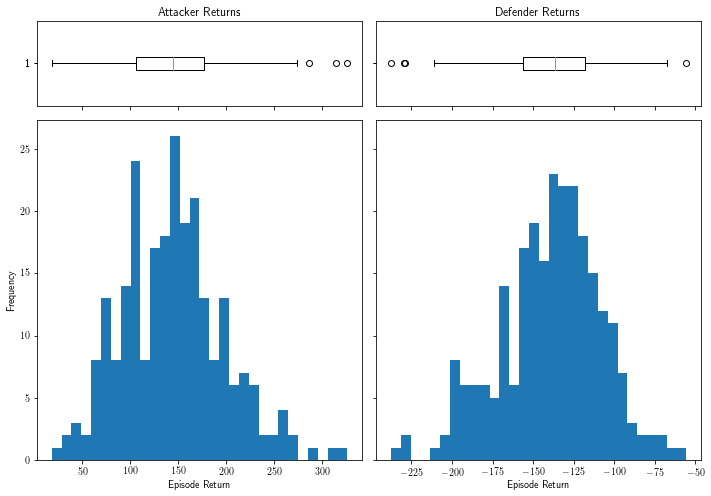

/home/mxsmith/anaconda3/envs/bgg/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/mxsmith/anaconda3/envs/bgg/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/mxsmith/anaconda3/envs/bgg/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


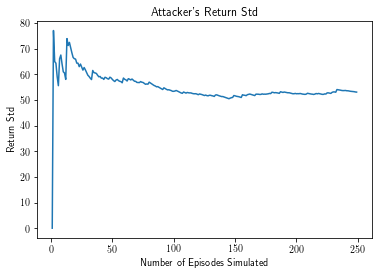

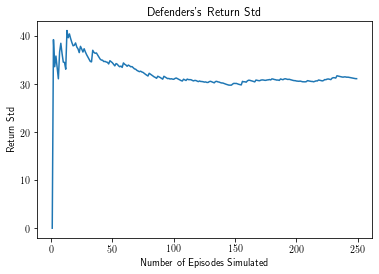

In [16]:
run_dir = osp.join(RESULTS_DIR, "09_24_egta2_dqn")
epoch = 4
attacker = 4
defender = 4

plot_simulation_variances(run_dir, epoch, attacker, defender, n_bins=30)